
### Q.1 Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

A. 1. We will use the psudo code provided to extract the fasta file in sequence_data_dict. For this we need to import libraries.

This function gets DNA sequences from a FASTA file.

It creates a dictionary (sequence_data_dict) that makes the keys as "genus + species), 
the values are the DNA sequences for each key.

To accomplish this, it uses SeqIO.parse() (from biopython).  The parse() function iterates through each
sequence in the fasta and for every sequence, it splits the description (i.e., header), gets the species name
by concatenating the second and third words (genus and species), and puts the sequence in the dictionary using 
the species name as the key.


Input:
The input to the function is the FASTA filename.

Output:
A dictionary which maps the species names to their DNA sequences.



In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #Empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # for loop to itirate through fasta fdor every sequence
        description = record.description.split()
        species_name = description[1] + " " + description[2]  # extract species name
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)



### Q.2 Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

A.2 Now we will create a function called translate_function.
    For this we will take a DNA sequence as input from biopython obj
    and convert it to string.We will get the correct codon table (it mentions Vertebrate Mitochondrial) then 
    start an empty string for the amino acid sequence and go through the DNA sequence in groups of three (codon by codon).
    Now translate each 'triplet' to the correct amino acid make sure we catch any errors (incomplete codons?) 
    and correctly handle the stop codon then return the codon.
    
    References: https://stackoverflow.com/questions/19521905/translation-dna-to-protein
                 https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi


In [4]:
def translate_function(string_nucleotides):
    
    if not isinstance(string_nucleotides, str):
        string_nucleotides = str(string_nucleotides)
    
    # Get the Vertebrate Mitochondrial codon table
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    # Initialize an empty string for the amino acid sequence
    aa_seq_string = ""
    
    #for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        
        if len(codon) < 3:
            break
            
        # Check for stop codon
        if codon in mito_table.stop_codons:
            break
            
        # Translate the codon to an amino acid
        try:
            aa = mito_table.forward_table[codon]
            aa_seq_string += aa
        except KeyError:
            #Unknown
            aa_seq_string += "X"
            
    return aa_seq_string


### Q.3 Write an alternative translation function.

A.3 Built a function called translate_with_biopython.It ensures the input is a BioPython Seq object.It uses the Seq.translate()
    method with the appropriate genetic code (table=2 for Vertebrate Mitochondrial).The to_stop=True parameter ensures 
    translation stops at the first stop codon. It returns the amino acid sequence as a string.
    
    References: https://biopython.org/wiki/Seq
                https://biopython.org/wiki/Seq


In [5]:
def translate_with_biopython(sequence):
    from Bio.Seq import Seq
    if not isinstance(sequence, Seq):
        sequence = Seq(str(sequence))
    amino_acid_seq = sequence.translate(table=2, to_stop=True)
    
    return str(amino_acid_seq)

### Q.4 Write a function that calculates the molecular weight of each 3 amino acid sequence.

A.4 Built a compute_molecular_weight function which takes an amino acid sequence as input. Ensures it's in string format.
    It removes stop symbols and handles invalid amino acids. 
    It uses BioPython's ProteinAnalysis module to calculate the molecular weight and returns the molecular weight in Daltons
    Includes error handling to manage any calculation issues
    
    References : https://biopython.org/wiki/ProtParam 

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    aa_seq_str = str(aa_seq)
    
    # ProteinAnalysis can't handle stop symbols ('*'), so we remove them
    aa_seq_str = aa_seq_str.replace("*", "")
    
    # Check for any invalid amino acids
    valid_aa = "ACDEFGHIKLMNPQRSTVWY"
    if any(aa not in valid_aa for aa in aa_seq_str):
        # Replace invalid amino acids with 'X'
        aa_seq_str = ''.join(aa if aa in valid_aa else 'X' for aa in aa_seq_str)
        # Remove 'X' as ProteinAnalysis cannot handle it
        aa_seq_str = aa_seq_str.replace("X", "")
    
    # If after cleaning there's no valid sequence, return 0
    if not aa_seq_str:
        return 0.0
    
    # Calculate molecular weight
    try:
        protein_analysis = ProteinAnalysis(aa_seq_str)
        molecular_weight = protein_analysis.molecular_weight()
        return molecular_weight
    except Exception as e:
        print(f"Error calculating molecular weight: {e}")
        return 0.0

### Q.5 Write a function that computes the GC-content of each DNA sequence.

A.5 Built calculate_gc_content function which takes a DNA sequence as input. It converts it to a string and ensures uppercase 
    letters and counts the number of G and C nucleotides. It calculates the total number of valid bases (A, T, G, C) and 
    computes the GC content as a percentage
    
    References: https://stackoverflow.com/questions/74075576/calculating-the-gc-content-of-a-list-of-sequences-individually 

In [7]:
def calculate_gc_content(dna_seq):
    seq_str = str(dna_seq).upper()
    
    # Count G and C nucleotides
    g_count = seq_str.count('G')
    c_count = seq_str.count('C')
    
    # Calculate total sequence length
    valid_bases = seq_str.count('A') + seq_str.count('T') + g_count + c_count
    
    # Calculate GC content as a percentage
    if valid_bases > 0:
        gc_content = (g_count + c_count) / valid_bases * 100
    else:
        gc_content = 0.0
        
    return gc_content

### Main function task :
    Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
    Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
    
Answer- First load the cytochrome-b sequences and the mass data. Adds two new columns to the DataFrame: molecular_weight and gc_content.Loops through each species and sequence.Translates the DNA sequences to amino acids. Calculates the molecular weight and GC content.Updates the DataFrame with these values.Displays the updated DataFrame

References: https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe 

In [8]:
# Load the sequences and mass data
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

# Add new columns to the DataFrame with NaN values
penguins_df['molecular_weight'] = float('NaN')
penguins_df['gc_content'] = float('NaN')

# Loop through each species and compute the molecular weight and GC content
for species, dna_seq in cytb_seqs.items():
    # Translate the DNA sequence to amino acids using BioPython's method
    aa_seq = translate_with_biopython(dna_seq)
    
    # Calculate molecular weight
    mol_weight = compute_molecular_weight(aa_seq)
    
    # Calculate GC content
    gc_content = calculate_gc_content(dna_seq)
    
    # Update the DataFrame
    if species in species_list:
        idx = penguins_df[penguins_df.species == species].index
        penguins_df.loc[idx, 'molecular_weight'] = mol_weight
        penguins_df.loc[idx, 'gc_content'] = gc_content
print(penguins_df)

                    species   mass  molecular_weight  gc_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


## Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these   questions:

### What is the smallest penguin species?' 
       
       The smallest penguin shown in the bar chart is "Eudyptula minor". 
       
       Reference: http://www.marineornithology.org/PDF/35_1/35_1_71-76.pdf
                  
                  https://www.researchgate.net/publication/228328933_Foraging_behaviour_and_habitat_selection_of_the_little_penguin_Eudyptula_minor_during_early_chick_rearing_in_Bass_Strait_Australia
       
### What is the geographical range of this species?'
       
       They are found in southern coastline of Australia and across New Zealand.
       
       References: https://ebird.org/species/litpen1#:~:text=Nests%20on%20the%20southern%20coastline,arriving%20ashore%20in%20the%20evening.
       
                   https://aszk.org.au/wp-content/uploads/2020/06/Little-Penguin-Eudyptula-minor-novaehollandiae-Bombonato-E.-Wright-L.-2012.pdf

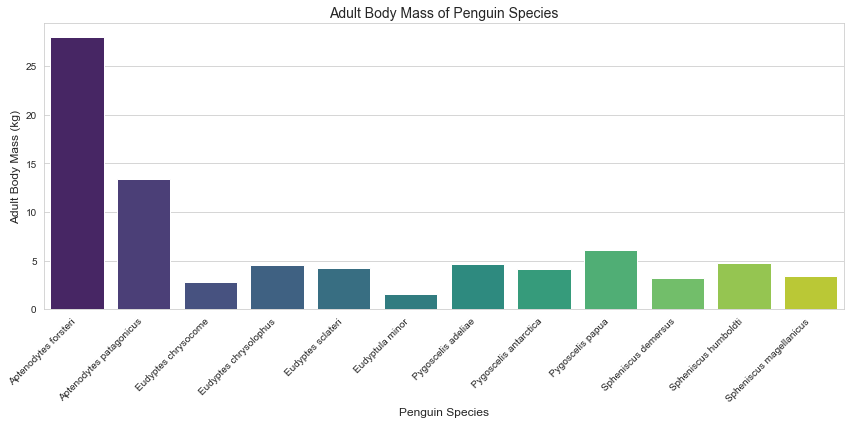

In [9]:
np.float = float

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x='species', y='mass', data=penguins_df, palette="viridis")
plt.xlabel('Penguin Species', fontsize=12)
plt.ylabel('Adult Body Mass (kg)', fontsize=12)
plt.title('Adult Body Mass of Penguin Species', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


### Plot a graph that shows the molecular weight as a function of GC content.

We will plot scatter plot for this purpose. First we will extract values for the two axis of heatmap from the data frame.

Then we will create bin edges and compute 2D histogram values for the heatmap and then finally plot haetmap.

Scatter plot is much easier with x as gc content, y as molecular weight and species are the scattered dots on the plot.

Heat map is not very informative, so I made scatter plot.

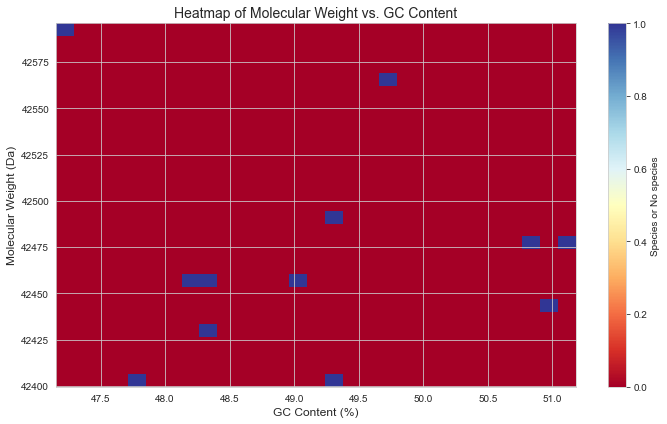

In [12]:

x = penguins_df['gc_content']
y = penguins_df['molecular_weight']

x_bins = np.linspace(x.min(), x.max(), 30)  
y_bins = np.linspace(y.min(), y.max(), 30) 

# values for hreatmap
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins])

plt.figure(figsize=(10, 6))
plt.imshow(
    heatmap.T,
    origin='lower',
    aspect='auto',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='RdYlBu'
)

plt.colorbar(label='Species or No species')
plt.xlabel('GC Content (%)', fontsize=12)
plt.ylabel('Molecular Weight (Da)', fontsize=12)
plt.title('Heatmap of Molecular Weight vs. GC Content', fontsize=14)
plt.tight_layout()
plt.show()


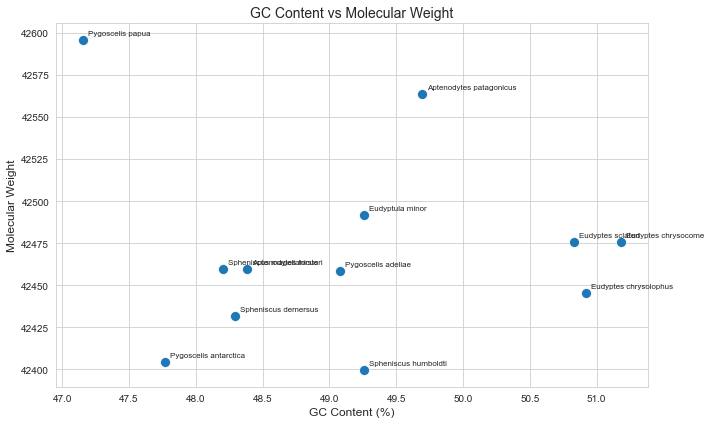

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# scatterplot
ax = sns.scatterplot(x='gc_content', y='molecular_weight', data=penguins_df, 
                     s=100) 


for i, txt in enumerate(penguins_df.species):
    plt.annotate(txt,
                 (penguins_df.gc_content.iloc[i], penguins_df.molecular_weight.iloc[i]),
                 fontsize=8,
                 xytext=(5, 5),
                 textcoords='offset points')


plt.xlabel('GC Content (%)', fontsize=12)
plt.ylabel('Molecular Weight', fontsize=12)
plt.title('GC Content vs Molecular Weight', fontsize=14)

plt.tight_layout()


### Write the entire DataFrame to a new CSV file that includes your new columns.
This is a easy step, we just have to use dataframe to csv function.

In [44]:
penguins_df.to_csv("penguins_mass_cytb_updatedWithOutput.csv", index=False)
print("DataFrame successfully saved to 'penguins_mass_cytb.csv'")

DataFrame successfully saved to 'penguins_mass_cytb.csv'


### BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

Through this assignment I learned data processing and data exploration. I understood how to interpret and read data from graphs.

I think from the given data something like clustering can be done. As we know from the assignment discription we are exploring the cytochrome-b sequences to amino acids for each of 12 species of penguins. From reserach we know that cytochrome-b is a mitrochondrial DNA. This implies that we can use it for evolutionary analysis. So we can simply cluster the data based on molecular weight . The speicies with similar mitrochondrial DNA molecular weight might have evolutionary closeness. To confirm the evolutionary closeness there are other factors to be evaluted but this can be just one of them.  

References: https://www.isfg.org/files/e94df91393c68ce21394acd2ff672376e02f5582.05014378_982612045714.pdf

            https://academic.oup.com/mbe/article/19/12/2337/997681
            
            https://link.springer.com/article/10.1007/BF00160404


C:\Users\Sadiya Ahmad\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


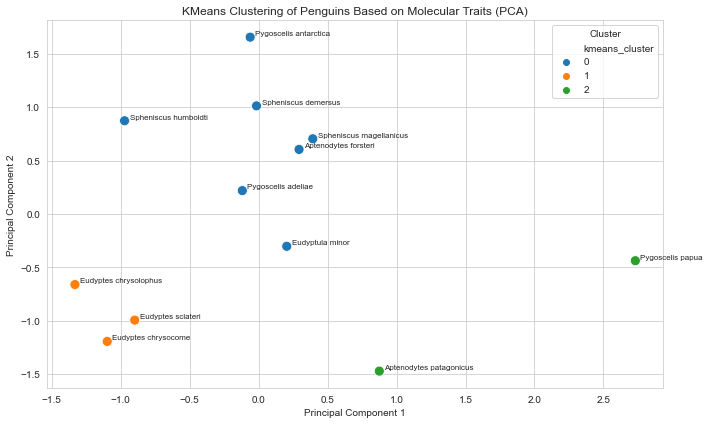

                species  kmeans_cluster
   Aptenodytes forsteri               0
        Eudyptula minor               0
     Pygoscelis adeliae               0
  Pygoscelis antarctica               0
    Spheniscus demersus               0
   Spheniscus humboldti               0
Spheniscus magellanicus               0
    Eudyptes chrysocome               1
  Eudyptes chrysolophus               1
      Eudyptes sclateri               1
Aptenodytes patagonicus               2
       Pygoscelis papua               2


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

penguins_df = pd.read_csv("penguins_mass_cytb_updatedWithOutput.csv")

# Select molecular traits, we can increase the characterics as we want.
X = penguins_df[['molecular_weight', 'gc_content']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
penguins_df[['PC1', 'PC2']] = X_pca

kmeans = KMeans(n_clusters=3, random_state=0)
penguins_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot PCA results with KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='tab10', s=100)

for i, txt in enumerate(penguins_df['species']):
    plt.annotate(txt, (penguins_df['PC1'][i], penguins_df['PC2'][i]), fontsize=8, xytext=(5, 2), textcoords='offset points')

plt.title("KMeans Clustering of Penguins Based on Molecular Traits (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

cluster_table = penguins_df[['species', 'kmeans_cluster']].sort_values(by='kmeans_cluster')
print(cluster_table.to_string(index=False))
